In [2]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from skimage import filters
from skimage import morphology
from skimage.morphology import black_tophat, white_tophat

In [9]:
def imageHistogram(input_image):
    if isinstance(input_image,(np.ndarray)):
        input_image = Image.fromarray(input_image)
        #myImage.show()
    plt.hist(list(input_image.getdata()), bins=255, range=(0,255))
    plt.show()

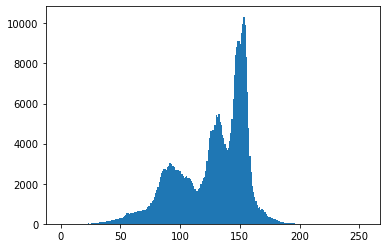

In [5]:
image = skimage.io.imread(r'Malarai_5slices_sl1_ch1_p1_t1_copy.jpeg')
imageHistogram(image)

In [4]:
def thresholdImage2(picture):
    image_threshold = filters.threshold_otsu(picture)
    image_array = picture < image_threshold
    #imageHistogram(image_array)
    #top_hat = black_tophat(image_array)
    return image_array


AttributeError: 'tuple' object has no attribute 'imshow'

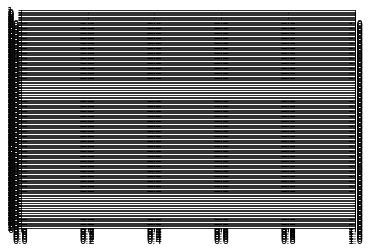

In [66]:
original_image = skimage.io.imread('/Users/reganlamoureux/cropped_originals/cropped_original_image_75.png')
#/Users/reganlamoureux/cropped_originals/cropped_original_image_75.png
#imageHistogram(original_image)
threshold_image = thresholdImage2(original_image)
ax = plt.subplots(131)
ax.imshow(threshold_image)

In [30]:
def morphology_image(skimage_image):
    eroded_image=skimage.morphology.erosion(skimage_image)
    dilated_image=skimage.morphology.dilation(skimage_image)
    opened_image = skimage.morphology.opening(skimage_image)
    closed_image = skimage.morphology.closing(skimage_image)
      
    hist, axes = plt.subplots(4, figsize=(32,24))
    axes[0].imshow(eroded_image, cmap='gray')
    axes[1].imshow(dilated_image, cmap='gray')
    axes[2].imshow(opened_image, cmap='gray')
    axes[3].imshow(closed_image, cmap='gray')

<class 'numpy.ndarray'>


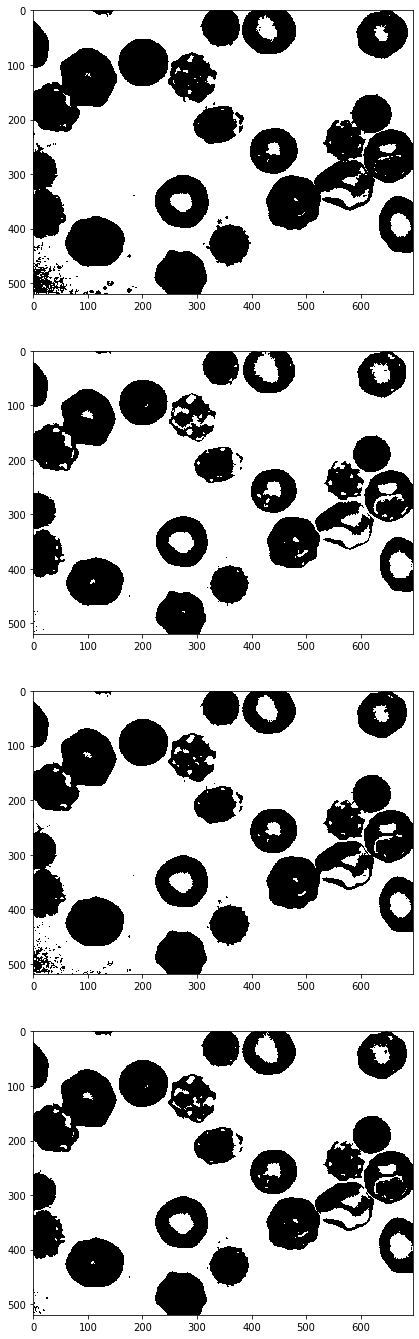

In [31]:
original_image = Image.open(r'malariaImage2.png')
image_array = np.asanyarray(original_image)
print(type(image_array))
morphology(image_array)

In [62]:
def thresholdImage(picture):
    new_image = Image.new(picture.mode, picture.size)
    image = np.asanyarray(picture)
    image_threshold = filters.threshold_otsu(image)
    #imageArray = image > imageThreshold
    for i in range(0, picture.size[0]):
        for j in range(0, picture.size[1]):
            pixel = picture.getpixel((i, j))
            if pixel >= image_threshold:
                new_image.putpixel((i, j), 255)
            else:
                new_image.putpixel((i, j), 0)
    new_image.show()
    imageHistogram(new_image)
    new_image_array = np.asanyarray(new_image)
    morphology(new_image_array)
    new_image.save('malariaImage4.png')

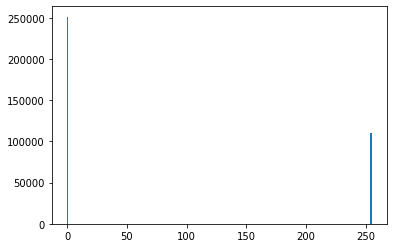

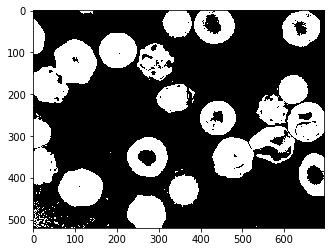

In [10]:
my_image = skimage.io.imread('Malarai_5slices_sl1_ch1_p1_t1_copy.jpeg')
thresh = thresholdImage2(my_image)
hist = imageHistogram(thresh)
plt.imshow(thresh, cmap='gray')